In [1]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../twitter/tweetdata/2019_down4_tweet.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../twitter/tweetdata/2019_down4_tweet(e).csv', error_bad_lines=False))


In [2]:
text = data[['text']].astype(str)
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
#text['main article'] = text.apply(lambda row: row['main article'].replace("",""), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)



In [3]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [4]:
text['text']

0     [53, days, left, of, my, 3rd, decade, ., Wht, ...
1                   [So, bitcoin, is, insecure, too, ?]
2     [Huh, ?, Lots, of, people, read, bitcoin, maga...
3     [The, 2nd, most, supported, cryptocurrency, in...
4     [I, just, announced, a, $, 200M, USD, Bitcoin,...
                            ...                        
34    [I, 've, been, vocal, about, the, Ethereum, co...
35    [Put, another, way, ,, #, Ethereum, ’, s, util...
36    [The, #, Ethereum, Istanbul, network, upgrade,...
37    [Next, week, ,, on, Nov, 20th, @, 11am, EST, ,...
38    [Sat, down, with, @, DelRayMan, of, @, Forbes,...
Name: text, Length: 295, dtype: object

In [5]:
# 소문자 적용 , - 문자 삭제
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

In [6]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

In [7]:
text['pos tag']

0     [(53, CD), (days, NNS), (left, VBN), (of, IN),...
1     [(so, RB), (bitcoin, NN), (is, VBZ), (insecure...
2     [(huh, NN), (?, .), (lots, NNS), (of, IN), (pe...
3     [(the, DT), (2nd, CD), (most, JJS), (supported...
4     [(i, NN), (just, RB), (announced, VBD), (a, DT...
                            ...                        
34    [(i, NN), ('ve, VBP), (been, VBN), (vocal, JJ)...
35    [(put, VB), (another, DT), (way, NN), (,, ,), ...
36    [(the, DT), (#, #), (ethereum, NN), (istanbul,...
37    [(next, JJ), (week, NN), (,, ,), (on, IN), (no...
38    [(sat, VBD), (down, RP), (with, IN), (@, JJ), ...
Name: pos tag, Length: 295, dtype: object

In [8]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

In [9]:
text['text']

0     [days, left, decade, ., wht, abt, u, ?, :, stu...
1                            [bitcoin, is, insecure, ?]
2     [huh, ?, lots, people, read, bitcoin, magazine...
3     [most, supported, cryptocurrency, atms, other,...
4     [i, announced, $, usd, bitcoin, cash, ecosyste...
                            ...                        
34    [i, 've, been, vocal, ethereum, community, 's,...
35    [put, way, ,, #, ethereum, ’, s, utility, ledg...
36    [#, ethereum, istanbul, network, upgrade, is, ...
37    [next, week, ,, nov, 20th, @, est, ,, @, conse...
38    [sat, down, @, delrayman, @, forbes, covered, ...
Name: text, Length: 295, dtype: object

In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

In [11]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

In [12]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


In [13]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

In [14]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

In [15]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

In [16]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

In [17]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [18]:
article_contents = tokenized_doc.values.tolist()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [20]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [21]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [22]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [23]:
word2id = defaultdict(lambda: 0)

In [24]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [25]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [26]:
len(tf_idf_result)

1437

In [27]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

1437


In [28]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [29]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.002*"watch" + 0.002*"macroeconomist" + 0.002*"hypothetical" + 0.002*"boycott" + 0.002*"government" + 0.002*"inflate" + 0.002*"capitalist" + 0.002*"neat"')
(1, '0.002*"assay" + 0.002*"coinmine" + 0.002*"fail" + 0.002*"take" + 0.002*"traduction" + 0.002*"ravi" + 0.002*"claim" + 0.002*"plat"')
(2, '0.002*"fullnodes" + 0.002*"resilience" + 0.002*"withstand" + 0.002*"lack" + 0.002*"edict" + 0.002*"legal" + 0.002*"unchainedcap" + 0.002*"generation"')
(3, '0.002*"empty" + 0.002*"dash" + 0.002*"argue" + 0.002*"good" + 0.002*"newspaper" + 0.002*"fwiw" + 0.002*"basis" + 0.002*"discount"')


In [30]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [31]:
sentences = article_contents

In [32]:
from gensim.models import Word2Vec

In [33]:
model = Word2Vec(sentences, min_count=1)

In [34]:
len(model.wv.vocab)

1437

In [35]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [36]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [37]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [38]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [39]:
temp_cluster_result['cluster'] = assigned_clusters

In [40]:
temp_cluster_result['raw_data'] = X.tolist()

In [41]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [42]:
from sklearn.metrics import pairwise_distances

In [43]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [44]:
len(cosine_centroid_list)

1437

In [45]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [46]:
sum(temp_distance[3])

1410.4584007399212

In [47]:
import scipy.spatial.distance as dist

In [48]:
dist.cosine(X[0],cosine_centroid_list[0])

0.8884169367324982

In [49]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.028837043887889907

In [50]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [51]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [52]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
789,"[0.0027128192596137524, -0.0004431678389664739...",française,0,"[0.0006290956, 7.8566394e-05, 0.00061122834, -...",0.398326,0.002940,1.395386,NaN
634,"[-0.0010995777556672692, 0.0028266627341508865...",point,0,"[0.0006290956, 7.8566394e-05, 0.00061122834, -...",0.608872,0.026457,1.582416,NaN
202,"[0.0030562246683984995, 0.0018501327140256763,...",immutable,0,"[0.0006290956, 7.8566394e-05, 0.00061122834, -...",0.622150,0.002940,1.619210,NaN
229,"[0.004556252155452967, 0.003057806985452771, -...",time,0,"[0.0006290956, 7.8566394e-05, 0.00061122834, -...",0.720259,0.082310,1.637949,NaN
235,"[0.0045144702307879925, 0.0005286116502247751,...",trade,0,"[0.0006290956, 7.8566394e-05, 0.00061122834, -...",0.723920,0.067611,1.656309,NaN
595,"[0.004663754254579544, -0.0004833234997931868,...",guess,0,"[0.0006290956, 7.8566394e-05, 0.00061122834, -...",0.671449,0.008819,1.662630,NaN
416,"[-0.0004446105158422142, 0.004777298774570227,...",start,0,"[0.0006290956, 7.8566394e-05, 0.00061122834, -...",0.687297,0.020577,1.666720,NaN
167,"[0.004645810462534428, 0.0014849366853013635, ...",group,0,"[0.0006290956, 7.8566394e-05, 0.00061122834, -...",0.688740,0.011759,1.676982,NaN
1434,"[-0.0008750486304052174, -0.002875524573028087...",libra_,0,"[0.0006290956, 7.8566394e-05, 0.00061122834, -...",0.682325,0.002940,1.679385,NaN
803,"[0.0050946506671607494, 0.0013654883950948715,...",thank,0,"[0.0006290956, 7.8566394e-05, 0.00061122834, -...",0.694232,0.014698,1.679534,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
625,"[-0.002561915200203657, 0.001300491509027779, ...",issuance,1,"[-0.0006185235, 0.00021211695, 0.00016064322, ...",0.508146,0.002940,1.505206,NaN
41,"[0.004948858637362719, 0.004608603660017252, 0...",http,1,"[-0.0006185235, 0.00021211695, 0.00016064322, ...",0.724744,0.144042,1.580703,NaN
170,"[-0.0022970838472247124, 0.004924402106553316,...",invest,1,"[-0.0006185235, 0.00021211695, 0.00016064322, ...",0.633909,0.029396,1.604513,NaN
1428,"[-0.003959080670028925, 0.0011684343917295337,...",forbes,1,"[-0.0006185235, 0.00021211695, 0.00016064322, ...",0.610879,0.002940,1.607939,NaN
349,"[-0.0012446686159819365, -0.000870329735334962...",unmatched,1,"[-0.0006185235, 0.00021211695, 0.00016064322, ...",0.636243,0.002940,1.633304,NaN
382,"[-0.0035038867499679327, -0.002780726877972483...",finance,1,"[-0.0006185235, 0.00021211695, 0.00016064322, ...",0.651193,0.002940,1.648253,NaN
1407,"[0.0037719816900789738, 0.002279616193845868, ...",traction,1,"[-0.0006185235, 0.00021211695, 0.00016064322, ...",0.656288,0.002940,1.653349,NaN
18,"[0.003748364979401231, 0.004168319515883923, 0...",people,1,"[-0.0006185235, 0.00021211695, 0.00016064322, ...",0.739271,0.079370,1.659901,NaN
333,"[-0.0016941886860877275, 0.0005575718241743743...",example,1,"[-0.0006185235, 0.00021211695, 0.00016064322, ...",0.668803,0.008819,1.659984,NaN
880,"[-0.0033771006856113672, -0.002558776177465915...",intelligent,1,"[-0.0006185235, 0.00021211695, 0.00016064322, ...",0.665119,0.002940,1.662179,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 거래소 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
6,"[0.0035801217891275883, 0.006064529996365309, ...",bitcoin,2,"[-9.990688e-05, -2.6567624e-05, -3.8232298e-05...",0.667335,0.899525,0.767809,NaN
16,"[-0.0010911086574196815, 0.0014793111477047205...",poloniex,2,"[-9.990688e-05, -2.6567624e-05, -3.8232298e-05...",0.588989,0.005879,1.583110,NaN
955,"[-0.0013638787204399705, -0.003911165986210108...",repel,2,"[-9.990688e-05, -2.6567624e-05, -3.8232298e-05...",0.587461,0.002940,1.584521,NaN
21,"[-0.0040074787102639675, -0.00398202333599329,...",ethereum,2,"[-9.990688e-05, -2.6567624e-05, -3.8232298e-05...",0.720782,0.117585,1.603197,NaN
212,"[0.0015145508805289865, 0.002544035902246833, ...",high,2,"[-9.990688e-05, -2.6567624e-05, -3.8232298e-05...",0.635982,0.017638,1.618345,NaN
296,"[0.004679152276366949, 0.0026048875879496336, ...",love,2,"[-9.990688e-05, -2.6567624e-05, -3.8232298e-05...",0.637791,0.014698,1.623093,NaN
502,"[0.0011399895884096622, -0.0023082145489752293...",phase,2,"[-9.990688e-05, -2.6567624e-05, -3.8232298e-05...",0.627783,0.002940,1.624843,NaN
1122,"[-0.0038565821014344692, -0.003130138618871569...",davidfbailey,2,"[-9.990688e-05, -2.6567624e-05, -3.8232298e-05...",0.660123,0.002940,1.657183,NaN
299,"[-0.0029106230940669775, -0.000570041127502918...",power,2,"[-9.990688e-05, -2.6567624e-05, -3.8232298e-05...",0.689992,0.020577,1.669415,NaN
757,"[-0.002258843509480357, 0.0006176050519570708,...",unabridged,2,"[-9.990688e-05, -2.6567624e-05, -3.8232298e-05...",0.677781,0.002940,1.674842,NaN


In [55]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
256,"[-0.0014250745298340917, -0.002074098680168390...",term,3,"[0.00022424027, -0.00012021707, -0.00047239865...",0.472625,0.032336,1.440289,NaN
369,"[0.001333311083726585, 0.002897320780903101, -...",keep,3,"[0.00022424027, -0.00012021707, -0.00047239865...",0.629290,0.020577,1.608713,NaN
7,"[0.003015021560713649, -0.0015900613507255912,...",work,3,"[0.00022424027, -0.00012021707, -0.00047239865...",0.689262,0.041155,1.648107,NaN
1275,"[0.0043479627929627895, -0.0036522012669593096...",hodlers,3,"[0.00022424027, -0.00012021707, -0.00047239865...",0.661243,0.002940,1.658303,NaN
93,"[-0.002738292096182704, -0.003662015777081251,...",serious,3,"[0.00022424027, -0.00012021707, -0.00047239865...",0.671765,0.005879,1.665886,NaN
185,"[-0.0005378569476306438, -0.004293386358767748...",others,3,"[0.00022424027, -0.00012021707, -0.00047239865...",0.676747,0.008819,1.667928,NaN
50,"[0.0009326977888122201, 0.003588935360312462, ...",know,3,"[0.00022424027, -0.00012021707, -0.00047239865...",0.705291,0.035276,1.670016,NaN
74,"[-0.0011251731775701046, -0.004041442647576332...",position,3,"[0.00022424027, -0.00012021707, -0.00047239865...",0.677023,0.005879,1.671143,NaN
227,"[-1.2576733752212021e-05, 0.004137042909860611...",value,3,"[0.00022424027, -0.00012021707, -0.00047239865...",0.741739,0.061732,1.680007,NaN
51,"[-0.0014784174272790551, -5.650188177241944e-0...",block,3,"[0.00022424027, -0.00012021707, -0.00047239865...",0.718921,0.038215,1.680705,NaN


In [59]:
y_km = temp_cluster_result['cluster'].values

In [60]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

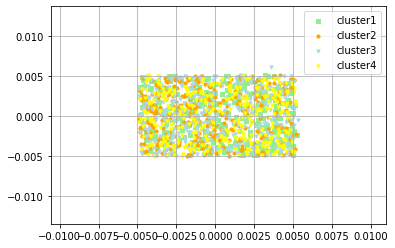

In [61]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [62]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 비즈

353

In [63]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 투자

367

In [64]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 거래소

366

In [65]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 기타

351

In [66]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 7 # 비즈
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 11 # 투자
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 12 # 거래소
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 13 # 기타

In [67]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [68]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [69]:
kmeans.inertia_

1.1759399516214941

In [70]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[1 2 3 ... 1 2 0]


In [71]:
cluster_values= list(model.wv.vocab)

In [72]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-1.17594


In [73]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [74]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.0084769465


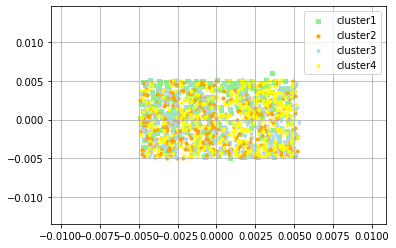

In [75]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [76]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [77]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [78]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [79]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [80]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [81]:
import scipy.spatial.distance as dist

In [82]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [83]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [84]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
6,"[0.0035801217891275883, 0.006064529996365309, ...",bitcoin,0,"[-0.00043836125, 0.0013487107, -0.00037587713,...",0.031723,0.899525,0.132197,NaN
229,"[0.004556252155452967, 0.003057806985452771, -...",time,0,"[-0.00043836125, 0.0013487107, -0.00037587713,...",0.028591,0.082310,0.946281,NaN
251,"[-0.0036605496425181627, 0.004341265186667442,...",asset,0,"[-0.00043836125, 0.0013487107, -0.00037587713,...",0.027682,0.049974,0.977708,NaN
247,"[0.002526085125282407, 0.0007144916453398764, ...",good,0,"[-0.00043836125, 0.0013487107, -0.00037587713,...",0.029158,0.047034,0.982124,NaN
205,"[0.003026417223736644, 0.0030725125689059496, ...",think,0,"[-0.00043836125, 0.0013487107, -0.00037587713,...",0.028313,0.044094,0.984218,NaN
339,"[-0.0027794174384325743, 0.0016056615859270096...",live,0,"[-0.00043836125, 0.0013487107, -0.00037587713,...",0.030292,0.035276,0.995016,NaN
121,"[-0.0024071321822702885, -0.002121075754985213...",many,0,"[-0.00043836125, 0.0013487107, -0.00037587713,...",0.028948,0.029396,0.999552,NaN
279,"[0.004317936021834612, 0.0034440618474036455, ...",need,0,"[-0.00043836125, 0.0013487107, -0.00037587713,...",0.029936,0.029396,1.000540,NaN
622,"[-0.0001912025618366897, 0.001896509900689125,...",coin,0,"[-0.00043836125, 0.0013487107, -0.00037587713,...",0.028654,0.026457,1.002197,NaN
343,"[0.0035193506628274918, -0.002783616539090872,...",week,0,"[-0.00043836125, 0.0013487107, -0.00037587713,...",0.028760,0.026457,1.002303,NaN


In [85]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(30,'score') # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
329,"[0.0028779194690287113, -3.975413164880592e-06...",today,1,"[-0.00037613505, -0.00055455376, -0.0001701363...",0.026798,0.041155,0.985643,NaN
92,"[0.004004642833024263, 0.0037557855248451233, ...",mine,1,"[-0.00037613505, -0.00055455376, -0.0001701363...",0.030241,0.041155,0.989087,NaN
40,"[-0.0005276714800857008, -0.001685314928181469...",system,1,"[-0.00037613505, -0.00055455376, -0.0001701363...",0.030000,0.035276,0.994724,NaN
24,"[-0.0025415096897631884, 0.0017408957937732339...",post,1,"[-0.00037613505, -0.00055455376, -0.0001701363...",0.026646,0.029396,0.997250,NaN
255,"[0.005142782814800739, -0.004045185167342424, ...",important,1,"[-0.00037613505, -0.00055455376, -0.0001701363...",0.027909,0.029396,0.998513,NaN
15,"[0.0014059729874134064, 0.0011535871308296919,...",support,1,"[-0.00037613505, -0.00055455376, -0.0001701363...",0.028056,0.023517,1.004539,NaN
298,"[-0.0008447011932730675, -0.003557533957064151...",financial,1,"[-0.00037613505, -0.00055455376, -0.0001701363...",0.028338,0.023517,1.004821,NaN
78,"[-0.0023634578101336956, 0.0002999659918714314...",future,1,"[-0.00037613505, -0.00055455376, -0.0001701363...",0.028470,0.023517,1.004953,NaN
334,"[0.0020800111815333366, 0.004367838613688946, ...",everything,1,"[-0.00037613505, -0.00055455376, -0.0001701363...",0.028812,0.023517,1.005295,NaN
484,"[-0.001363640185445547, -0.0005140897119417787...",look,1,"[-0.00037613505, -0.00055455376, -0.0001701363...",0.029455,0.023517,1.005938,NaN


In [86]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(40,'score')  # 협업

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
235,"[0.0045144702307879925, 0.0005286116502247751,...",trade,2,"[0.00015213556, -0.00050293194, 0.00052557955,...",0.028369,0.067611,0.960757,NaN
9,"[0.001313264132477343, -0.0027458430267870426,...",make,2,"[0.00015213556, -0.00050293194, 0.00052557955,...",0.029351,0.058793,0.970558,NaN
122,"[-0.001382325659506023, -0.0005169006763026118...",year,2,"[0.00015213556, -0.00050293194, 0.00052557955,...",0.028214,0.049974,0.978240,NaN
392,"[-0.004424959886819124, 0.0016889047110453248,...",bank,2,"[0.00015213556, -0.00050293194, 0.00052557955,...",0.025737,0.044094,0.981643,NaN
51,"[-0.0014784174272790551, -5.650188177241944e-0...",block,2,"[0.00015213556, -0.00050293194, 0.00052557955,...",0.030180,0.038215,0.991965,NaN
31,"[0.002297960454598069, -0.0024039451964199543,...",fund,2,"[0.00015213556, -0.00050293194, 0.00052557955,...",0.027634,0.035276,0.992359,NaN
150,"[0.001712121069431305, -0.0019595702178776264,...",lose,2,"[0.00015213556, -0.00050293194, 0.00052557955,...",0.030918,0.035276,0.995642,NaN
278,"[0.0053014811128377914, -0.0004570415476337075...",digital,2,"[0.00015213556, -0.00050293194, 0.00052557955,...",0.029450,0.032336,0.997114,NaN
230,"[-0.002690849592909217, -0.003337800269946456,...",first,2,"[0.00015213556, -0.00050293194, 0.00052557955,...",0.029273,0.029396,0.999877,NaN
89,"[-0.0030010468326509, 0.003057386726140976, -0...",china,2,"[0.00015213556, -0.00050293194, 0.00052557955,...",0.027882,0.026457,1.001426,NaN


In [87]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 거래소, 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
41,"[0.004948858637362719, 0.004608603660017252, 0...",http,3,"[0.00067391474, -1.8261784e-05, 0.00022867188,...",0.030118,0.144042,0.886076,NaN
21,"[-0.0040074787102639675, -0.00398202333599329,...",ethereum,3,"[0.00067391474, -1.8261784e-05, 0.00022867188,...",0.029400,0.117585,0.911815,NaN
45,"[0.0037216458003968, -0.003987460862845182, 0....",crypto,3,"[0.00067391474, -1.8261784e-05, 0.00022867188,...",0.028616,0.088189,0.940427,NaN
18,"[0.003748364979401231, 0.004168319515883923, 0...",people,3,"[0.00067391474, -1.8261784e-05, 0.00022867188,...",0.028126,0.079370,0.948756,NaN
227,"[-1.2576733752212021e-05, 0.004137042909860611...",value,3,"[0.00067391474, -1.8261784e-05, 0.00022867188,...",0.031538,0.061732,0.969806,NaN
70,"[-0.0033573568798601627, -0.001429134164936840...",market,3,"[0.00067391474, -1.8261784e-05, 0.00022867188,...",0.027054,0.049974,0.977081,NaN
66,"[-0.002492383122444153, -0.0030268945265561342...",price,3,"[0.00067391474, -1.8261784e-05, 0.00022867188,...",0.028256,0.047034,0.981222,NaN
33,"[0.003125781426206231, -0.0033595117274671793,...",blockchain,3,"[0.00067391474, -1.8261784e-05, 0.00022867188,...",0.028414,0.044094,0.984320,NaN
396,"[0.0016588933067396283, -0.001404165755957365,...",next,3,"[0.00067391474, -1.8261784e-05, 0.00022867188,...",0.027487,0.038215,0.989271,NaN
7,"[0.003015021560713649, -0.0015900613507255912,...",work,3,"[0.00067391474, -1.8261784e-05, 0.00022867188,...",0.030467,0.041155,0.989312,NaN


In [88]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #투자

328

In [89]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #이슈

359

In [90]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #협업

363

In [91]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #거래소

387

In [92]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 11 # 투자
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 5 # 이슈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 8 # 협업
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 12 # 거래소

In [93]:
temp_cluster_result1['result'] = 2 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 2
temp_cluster_result1['Silhouette'] = 0.0084769465 # 1 상승 2 하락 3 보합
temp_cluster_result['Silhouette'] = 0.0084769465

In [94]:
temp_cluster_result1.to_csv("../cluster/twitter/twitter_2019_down4_euclidean.csv")
temp_cluster_result.to_csv("../cluster/twitter/twitter_2019_down4_cosine.csv")

In [95]:
word_vectors = model.wv

In [96]:
vocabs = word_vectors.vocab.keys()

In [97]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [98]:
print(word_vectors.similarity(w1='little',w2='push'))

-0.06822452


In [99]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [100]:
xys

array([[ 3.33093095e-05,  3.58890445e-03],
       [-4.28393467e-04,  3.16650899e-03],
       [-2.48149946e-03,  2.91612971e-03],
       ...,
       [ 2.83400125e-03,  3.54833502e-03],
       [-5.23659893e-03, -3.18701300e-03],
       [-5.02791706e-03, -2.43514552e-04]])

In [101]:
xys[:,0]

array([ 3.33093095e-05, -4.28393467e-04, -2.48149946e-03, ...,
        2.83400125e-03, -5.23659893e-03, -5.02791706e-03])

In [102]:
xys[:,1]

array([ 0.0035889 ,  0.00316651,  0.00291613, ...,  0.00354834,
       -0.00318701, -0.00024351])

In [103]:
xs = xys[:,0]
ys = xys[:,1]

In [104]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

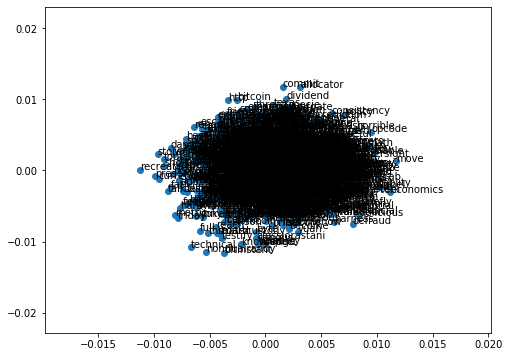

In [105]:
plot_2d_graph(vocabs,xs,ys)

In [106]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>